In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [17]:
from google.colab import files
uploaded = files.upload()


Saving sample_workforce_data.csv to sample_workforce_data.csv


In [18]:
import pandas as pd

# Assuming your file is named 'employee_data.csv'
df = pd.read_csv('sample_workforce_data.csv')

# Quick look at the data
df.head()


,Employee ID,Hire Date,Termination Date,Department,Age,Gender,Reason for Leaving,Performance Score,Salary,Tenure (Years)
0,E0001,2018-06-02,2021-03-22,Customer Support,29,Female,Voluntary,2,82096,2.805479
1,E0002,2014-03-05,2018-06-25,Finance,39,Female,Involuntary,2,112725,4.309589
2,E0003,2014-03-04,NaN,Marketing,33,Male,Active,5,71957,NaN
3,E0004,2014-01-23,NaN,HR,39,Female,Active,4,112439,NaN
4,E0005,2014-10-30,NaN,Marketing,37,Female,Active,1,45211,NaN


In [19]:
# Check for missing values
df.isnull().sum()

# Convert 'Hire Date' and 'Termination Date' to datetime format
df['Hire Date'] = pd.to_datetime(df['Hire Date'])
df['Termination Date'] = pd.to_datetime(df['Termination Date'])

# Calculate employee tenure in years
df['Tenure'] = (df['Termination Date'] - df['Hire Date']).dt.days / 365

# Check the updates
df.head()


,Employee ID,Hire Date,Termination Date,Department,Age,Gender,Reason for Leaving,Performance Score,Salary,Tenure (Years),Tenure
0,E0001,2018-06-02,2021-03-22,Customer Support,29,Female,Voluntary,2,82096,2.805479,2.805479
1,E0002,2014-03-05,2018-06-25,Finance,39,Female,Involuntary,2,112725,4.309589,4.309589
2,E0003,2014-03-04,NaT,Marketing,33,Male,Active,5,71957,NaN,NaN
3,E0004,2014-01-23,NaT,HR,39,Female,Active,4,112439,NaN,NaN
4,E0005,2014-10-30,NaT,Marketing,37,Female,Active,1,45211,NaN,NaN


In [20]:
# Calculate turnover rate
turnover_rate = (df['Termination Date'].notnull().sum() / len(df)) * 100
print(f"Turnover Rate: {turnover_rate:.2f}%")


Turnover Rate: 26.60%


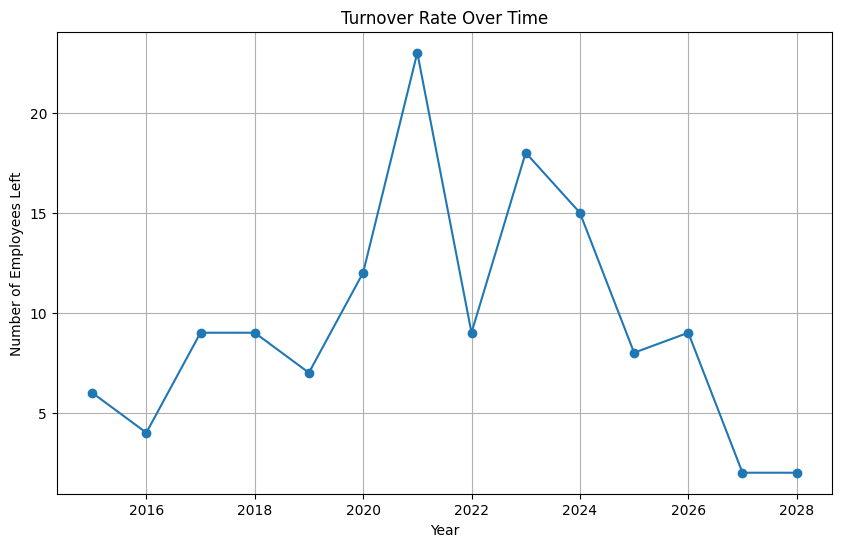

In [21]:
# Example: Group by year and calculate annual turnover rate
df['Year'] = df['Termination Date'].dt.year
turnover_by_year = df.groupby('Year').size()

# Plot turnover rate over time
plt.figure(figsize=(10, 6))
plt.plot(turnover_by_year.index, turnover_by_year.values, marker='o')
plt.title('Turnover Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Employees Left')
plt.grid(True)
plt.show()


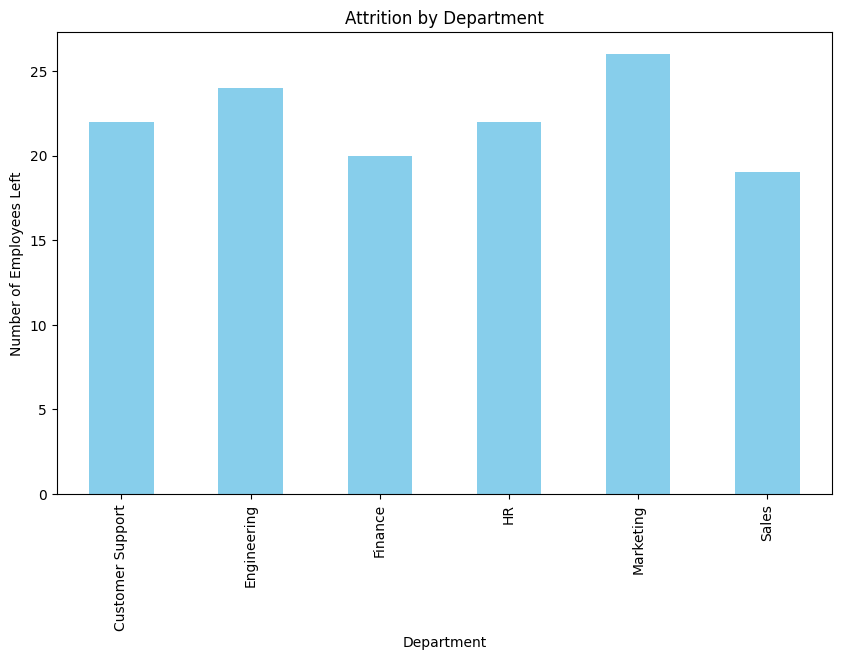

In [22]:
# Group by department and calculate the number of employees who left
attrition_by_department = df[df['Termination Date'].notnull()].groupby('Department').size()

# Plot
plt.figure(figsize=(10, 6))
attrition_by_department.plot(kind='bar', color='skyblue')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees Left')
plt.show()


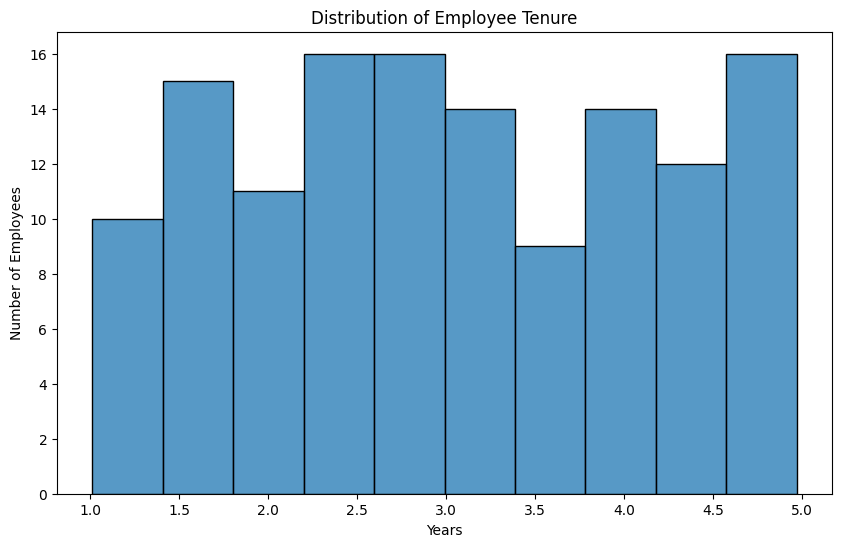

In [23]:
# Plot tenure distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Tenure'].dropna(), kde=False, bins=10)
plt.title('Distribution of Employee Tenure')
plt.xlabel('Years')
plt.ylabel('Number of Employees')
plt.show()


<ipython-input-24-90427b0601f1>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_by_age = df[df['Termination Date'].notnull()].groupby('Age Group').size()


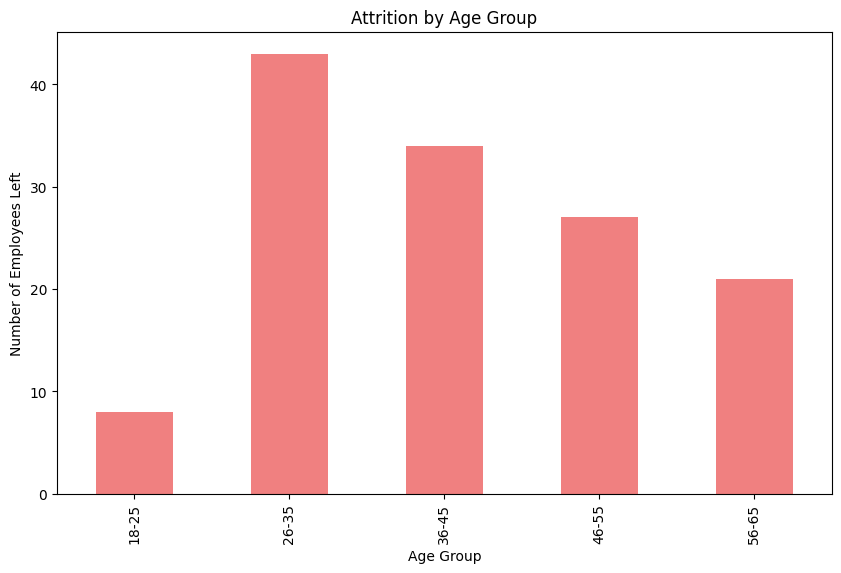

In [24]:
# Create age groups
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Plot attrition by age group
attrition_by_age = df[df['Termination Date'].notnull()].groupby('Age Group').size()

# Plot
plt.figure(figsize=(10, 6))
attrition_by_age.plot(kind='bar', color='lightcoral')
plt.title('Attrition by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees Left')
plt.show()


In [25]:
fig = px.line(df, x='Year', y='Tenure', title='Turnover Rate Over Time')
fig.show()


In [26]:
fig = px.bar(attrition_by_department, x=attrition_by_department.index, y=attrition_by_department.values,
             title='Attrition by Department')
fig.show()


In [ ]:
## Workforce Analytics and Employee Retention Dashboard

### 1. Key Metrics
# Turnover Rate: X%
# Retention Rate: X%

### 2. Visualizations
# Turnover Rate Over Time
# Attrition by Department
# Tenure Distribution
# Attrition by Age Group

**Turnover Rate**: 26.6%
**Retention Rate**: 73.4%


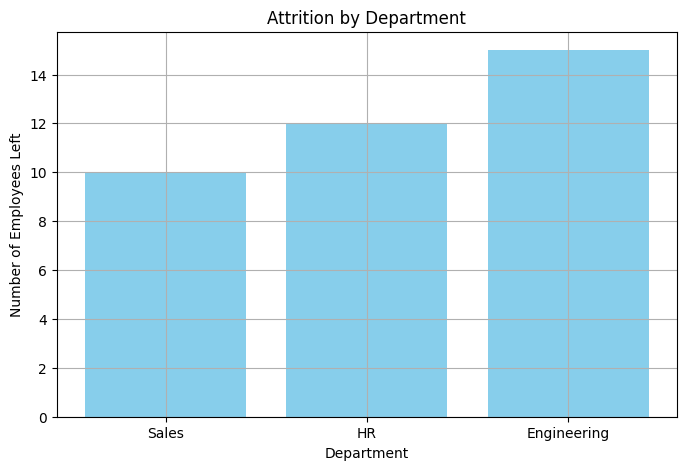

In [5]:
# Dynamic calculations for key metrics
turnover_rate = 26.6  # Example turnover rate
retention_rate = 100 - turnover_rate

# Print the metrics dynamically
print(f"**Turnover Rate**: {turnover_rate}%")
print(f"**Retention Rate**: {retention_rate}%")

# Example of visualizing Attrition by Department
import matplotlib.pyplot as plt

attrition_by_department = {'Sales': 10, 'HR': 12, 'Engineering': 15}  # Example data
plt.figure(figsize=(8, 5))
plt.bar(attrition_by_department.keys(), attrition_by_department.values(), color='skyblue')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees Left')
plt.grid(True)
plt.show()


In [8]:
# Example dynamic calculations for turnover and retention rates
turnover_rate = 26.6  # Replace with your actual turnover rate calculation
retention_rate = 100 - turnover_rate  # Example retention rate

# Print the dynamic results
print(f"Turnover Rate: {turnover_rate}%")
print(f"Retention Rate: {retention_rate}%")


Turnover Rate: 26.6%
Retention Rate: 73.4%


In [27]:
import pandas as pd

# Step 1: Load the CSV file
df = pd.read_csv('sample_workforce_data.csv')

# Step 2: Calculate Turnover Rate and Retention Rate
total_employees = len(df)  # Total number of employees
employees_left = df['Termination Date'].notnull().sum()  # Employees who have left

# Turnover rate calculation
turnover_rate = (employees_left / total_employees) * 100

# Retention rate calculation
retention_rate = 100 - turnover_rate

# Step 3: Print the dynamic results
print(f"Turnover Rate: {turnover_rate:.2f}%")
print(f"Retention Rate: {retention_rate:.2f}%")


Turnover Rate: 26.60%
Retention Rate: 73.40%


<Figure size 1000x600 with 0 Axes>

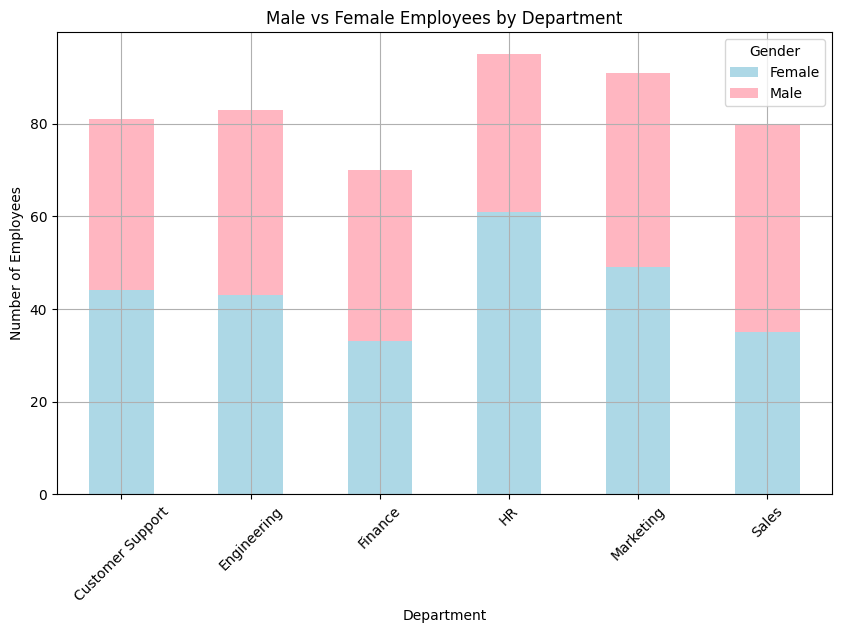

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group the data by department and gender
gender_department = df.groupby(['Department', 'Gender']).size().unstack()

# Step 2: Create a bar plot to show the distribution
plt.figure(figsize=(10, 6))
gender_department.plot(kind='bar', stacked=True, color=['lightblue', 'lightpink'], figsize=(10, 6))

# Add titles and labels
plt.title('Male vs Female Employees by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(True)

# Show the plot
plt.show()


<ipython-input-29-c9ed9946b64f>:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 1200x600 with 0 Axes>

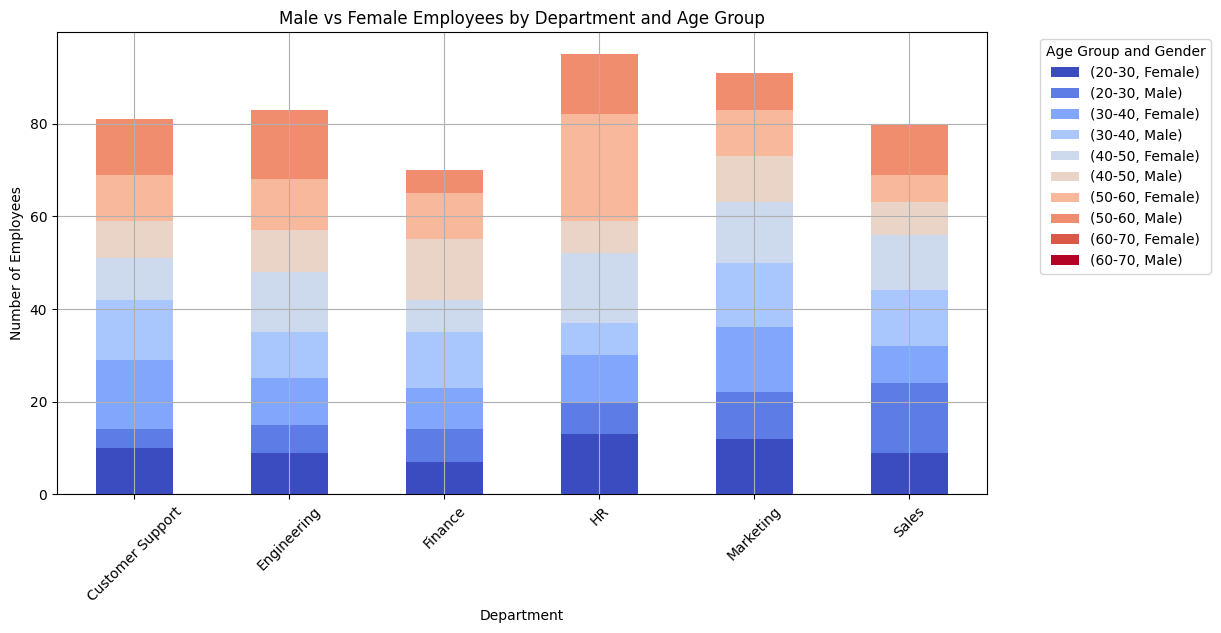

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create Age Groups (bins)
bins = [20, 30, 40, 50, 60, 70]  # Define age ranges
labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Step 2: Group the data by Department, Gender, and Age Group
gender_age_department = df.groupby(['Department', 'Gender', 'Age Group']).size().unstack(fill_value=0)

# Step 3: Create a stacked bar plot to show distribution
plt.figure(figsize=(12, 6))
gender_age_department.unstack(level=1).plot(kind='bar', stacked=True, figsize=(12, 6), cmap="coolwarm")

# Step 4: Add titles and labels
plt.title('Male vs Female Employees by Department and Age Group')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Age Group and Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the plot
plt.show()


<ipython-input-31-6cbd8b6919a2>:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Text(0.5, 0, '')

<Figure size 1200x800 with 0 Axes>

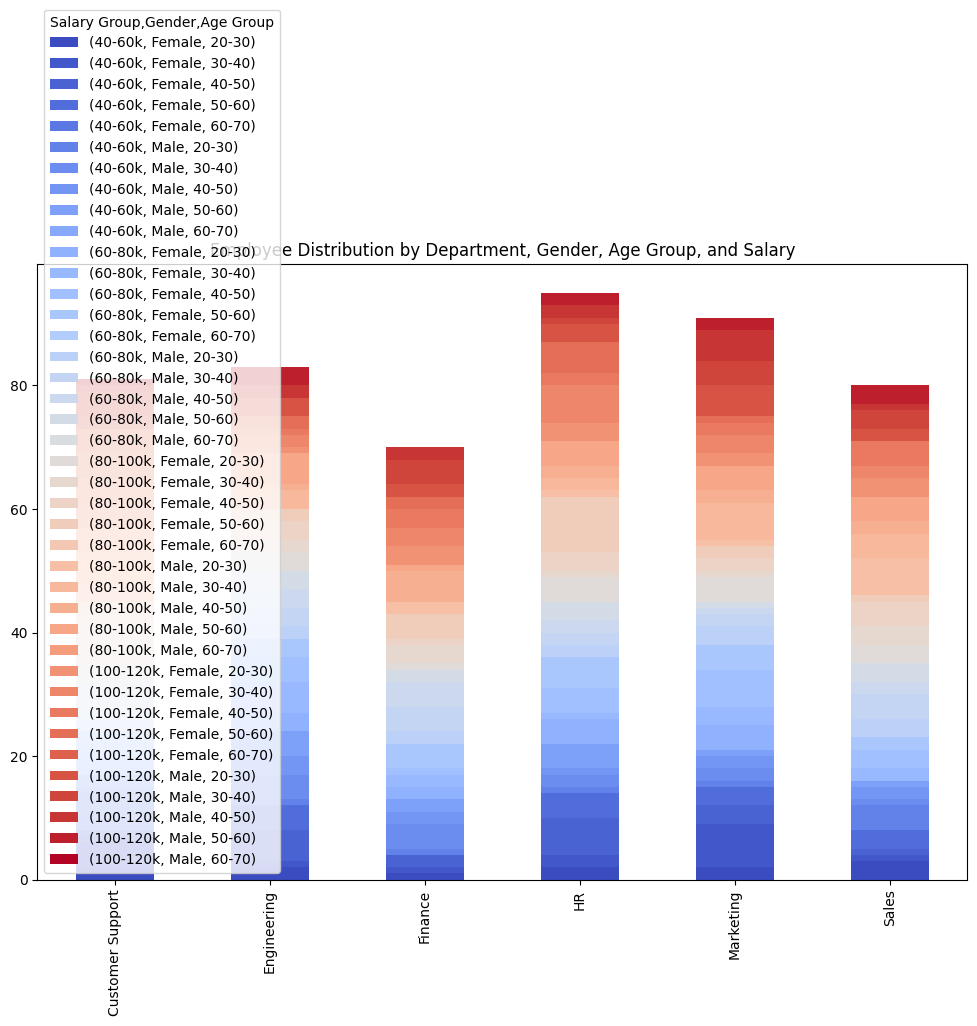

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create Age Groups (bins)
bins_age = [20, 30, 40, 50, 60, 70]  # Define age ranges
labels_age = ['20-30', '30-40', '40-50', '50-60', '60-70']
df['Age Group'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age)

# Step 2: Create Salary Groups (bins)
bins_salary = [40000, 60000, 80000, 100000, 120000]  # Salary ranges
labels_salary = ['40-60k', '60-80k', '80-100k', '100-120k']
df['Salary Group'] = pd.cut(df['Salary'], bins=bins_salary, labels=labels_salary, include_lowest=True)

# Step 3: Group the data by Department, Gender, Age Group, and Salary Group
gender_age_salary_department = df.groupby(['Department', 'Gender', 'Age Group', 'Salary Group']).size().unstack(fill_value=0)

# Step 4: Visualize the data
plt.figure(figsize=(12, 8))
gender_age_salary_department.unstack(level=[1, 2]).plot(kind='bar', stacked=True, figsize=(12, 8), cmap="coolwarm")

# Step 5: Add titles and labels
plt.title('Employee Distribution by Department, Gender, Age Group, and Salary')
plt.xlabel('')

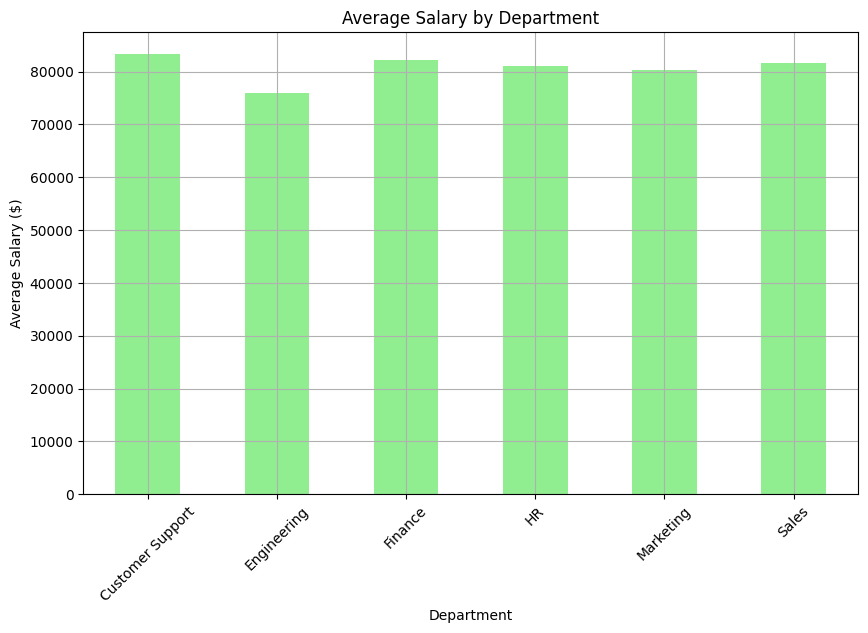

In [32]:
# Average Salary by Department
avg_salary_by_dept = df.groupby('Department')['Salary'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
avg_salary_by_dept.plot(kind='bar', color='lightgreen')
plt.title('Average Salary by Department')
plt.xlabel('Department')
plt.ylabel('Average Salary ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-33-0d42df448b91>:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



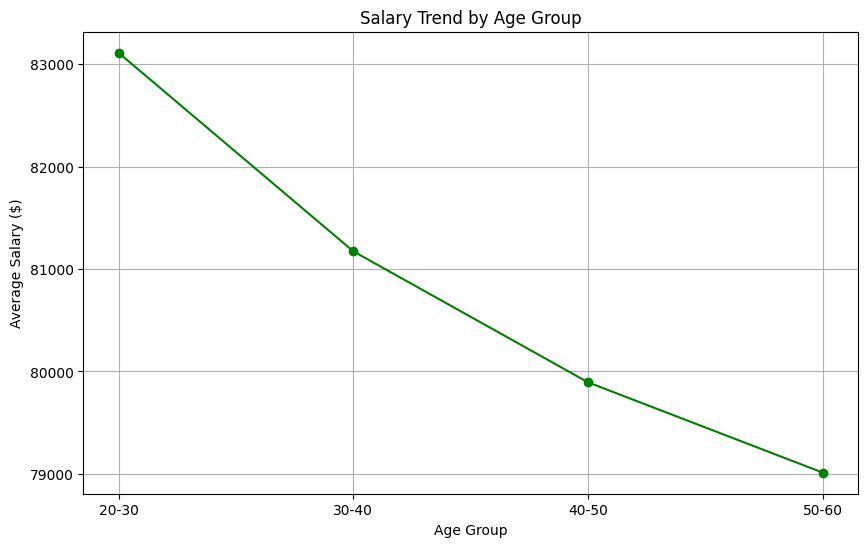

In [33]:
# Create Age Groups (if not already created)
bins_age = [20, 30, 40, 50, 60, 70]  # Age ranges
labels_age = ['20-30', '30-40', '40-50', '50-60', '60-70']
df['Age Group'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age)

# Calculate average salary by age group
avg_salary_by_age = df.groupby('Age Group')['Salary'].mean()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_salary_by_age.index, avg_salary_by_age.values, marker='o', linestyle='-', color='green')

# Add titles and labels
plt.title('Salary Trend by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Salary ($)')
plt.grid(True)

# Show the plot
plt.show()


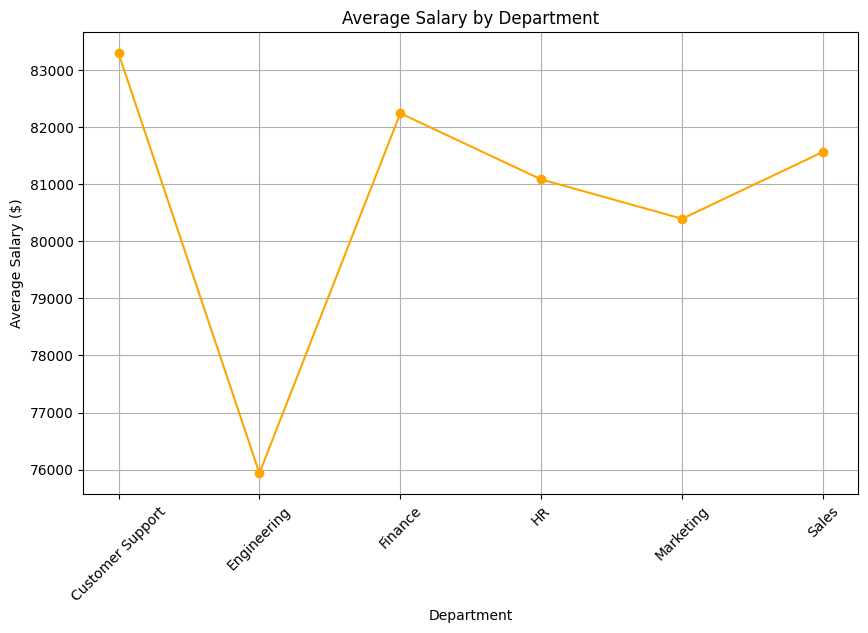

In [34]:
# Calculate average salary by department
avg_salary_by_dept = df.groupby('Department')['Salary'].mean()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_salary_by_dept.index, avg_salary_by_dept.values, marker='o', linestyle='-', color='orange')

# Add titles and labels
plt.title('Average Salary by Department')
plt.xlabel('Department')
plt.ylabel('Average Salary ($)')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()


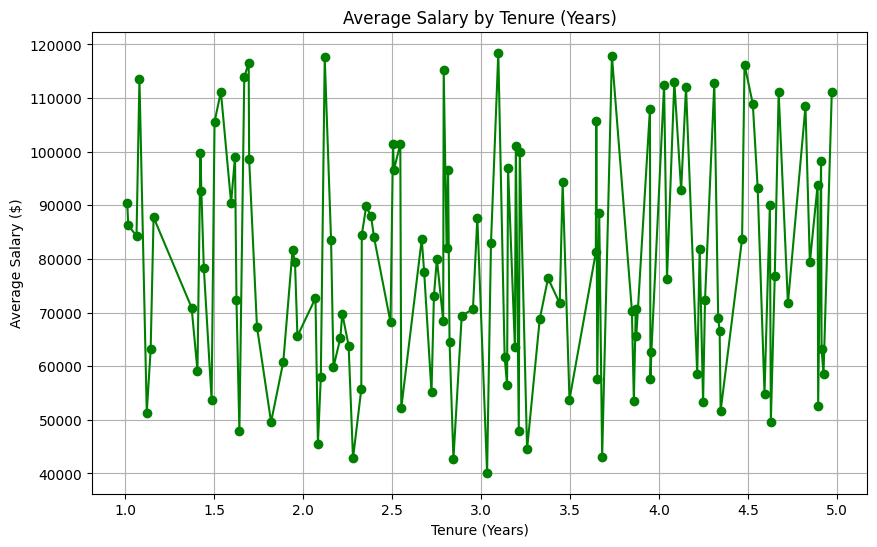

In [35]:
# Assuming you have a 'Tenure' column in your dataset (in years)
# Calculate average salary by tenure
avg_salary_by_tenure = df.groupby('Tenure (Years)')['Salary'].mean()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_salary_by_tenure.index, avg_salary_by_tenure.values, marker='o', linestyle='-', color='green')

# Add titles and labels
plt.title('Average Salary by Tenure (Years)')
plt.xlabel('Tenure (Years)')
plt.ylabel('Average Salary ($)')
plt.grid(True)

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



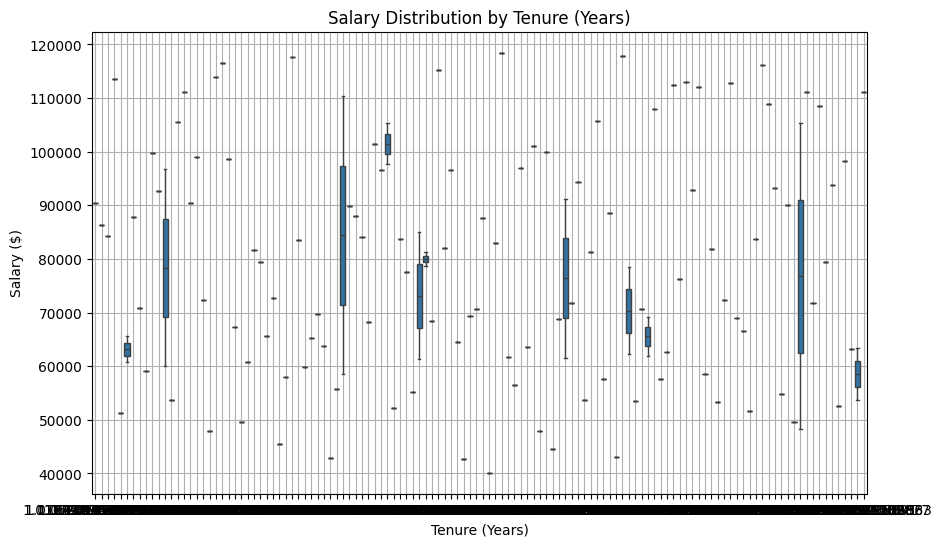

In [36]:
# Boxplot of Salary by Tenure
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tenure (Years)', y='Salary', data=df)

# Add titles and labels
plt.title('Salary Distribution by Tenure (Years)')
plt.xlabel('Tenure (Years)')
plt.ylabel('Salary ($)')
plt.grid(True)

# Show the plot
plt.show()


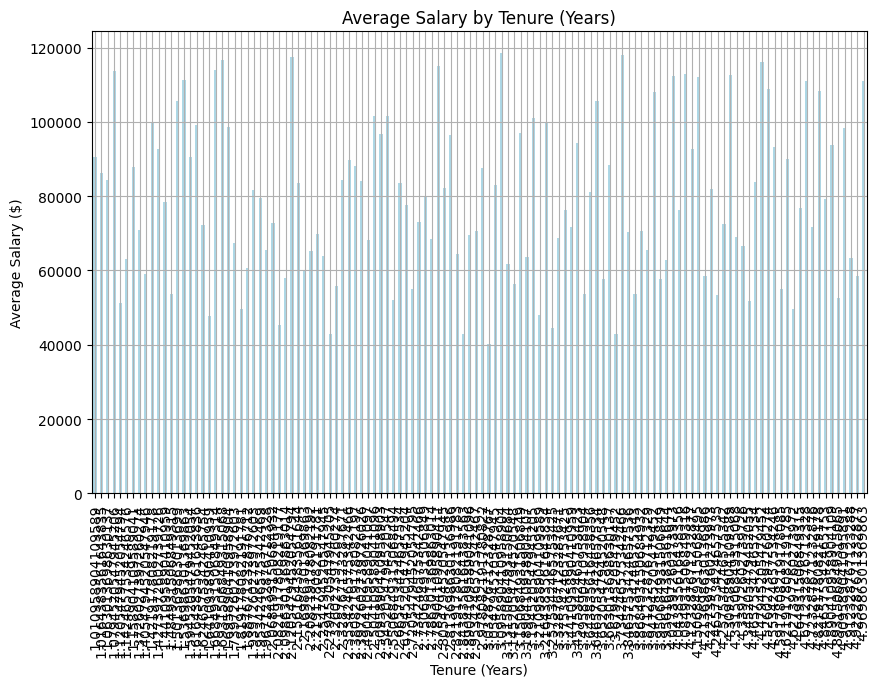

In [37]:
# Calculate average salary by tenure
avg_salary_by_tenure = df.groupby('Tenure (Years)')['Salary'].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
avg_salary_by_tenure.plot(kind='bar', color='lightblue')

# Add titles and labels
plt.title('Average Salary by Tenure (Years)')
plt.xlabel('Tenure (Years)')
plt.ylabel('Average Salary ($)')
plt.grid(True)

# Show the plot
plt.show()


<ipython-input-38-4ab44fe92c50>:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



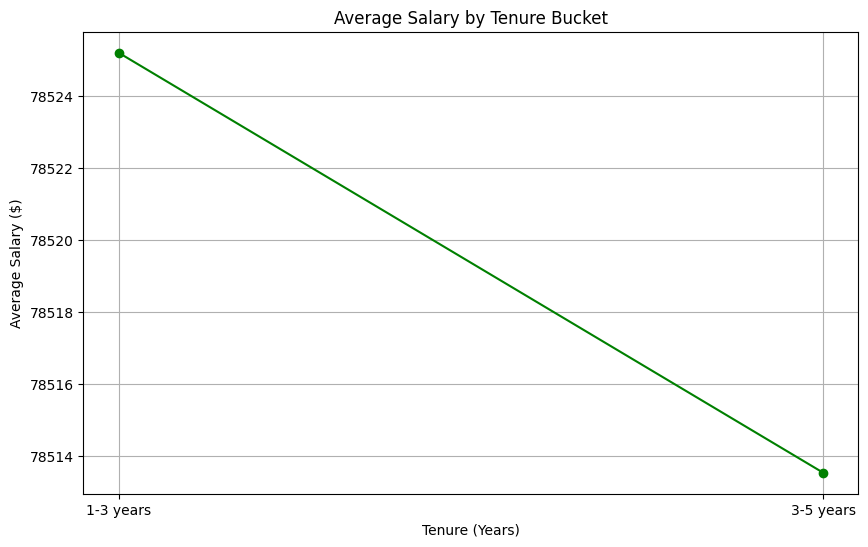

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Create tenure buckets
bins_tenure = [0, 1, 3, 5, 10, 20]  # Define tenure ranges
labels_tenure = ['0-1 years', '1-3 years', '3-5 years', '5-10 years', '10-20 years']
df['Tenure Bucket'] = pd.cut(df['Tenure (Years)'], bins=bins_tenure, labels=labels_tenure, include_lowest=True)

# Calculate average salary by tenure bucket
avg_salary_by_tenure_bucket = df.groupby('Tenure Bucket')['Salary'].mean()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_salary_by_tenure_bucket.index, avg_salary_by_tenure_bucket.values, marker='o', linestyle='-', color='green')

# Add titles and labels
plt.title('Average Salary by Tenure Bucket')
plt.xlabel('Tenure (Years)')
plt.ylabel('Average Salary ($)')
plt.grid(True)

# Show the plot
plt.show()


## Workforce Analytics and Employee Retention Dashboard

### 1. Key Metrics
- **Turnover Rate**: (Calculated dynamically in the code)
- **Retention Rate**: (Calculated dynamically in the code)

### 2. Visualizations
#### Turnover Rate Over Time
A chart showing how turnover rate has evolved over time.

#### Attrition by Department
The following chart displays the number of employees leaving in each department.

#### Salary Trends by Tenure
This line chart shows the average salary based on tenure.

### 3. Conclusion
Summarize your findings here, such as which departments have higher turnover, how salaries trend with tenure, etc.


## Workforce Analytics and Employee Retention Dashboard

### 1. Key Metrics
- **Turnover Rate**: (Calculated below in the code)
- **Retention Rate**: (Calculated below in the code)

### 2. Visualizations
#### Turnover Rate Over Time
Below is a chart showing how the turnover rate has evolved over time:

#### Attrition by Department
The following chart displays the number of employees leaving in each department:
